<a href="https://colab.research.google.com/github/haitamelkhamali/Analyzing-and-Forecasting-Student-Enrollment-in-Preparatory-Class-Centers-Across-Morocco/blob/main/LISS_EXPO_DBL_HAITAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sales = [200,210,220,250,270,300,320,340,370,400,420,450]
alpha = 0.5
beta = 0.3

In [12]:
Lt=[sales[0]]
Tt=[sales[1]-sales[0]]
Ft=[Lt[0]+Tt[0]]

In [13]:
alpha=0.5
beta=0.3
Lt=[sales[0]]
Tt=[sales[1]-sales[0]]
Ft=[Lt[0]+Tt[0]]
L1=200
T1=10
F2=L1+T1
for t in range(1,len(sales)):
  yt=sales[t]
  lt_prev=Lt[-1]
  tt_prev=Tt[-1]
  lt=alpha*yt+(1-alpha)*(lt_prev+tt_prev)
  tt=beta*(lt-lt_prev)+(1-beta)*tt_prev
  ft=lt+tt
  Lt.append(lt)
  Tt.append(tt)
  Ft.append(ft)
next_forecast=Lt[-1]+Tt[-1]
print(f"prevision pour janvier suivant : {next_forecast:.2f}")

prevision pour janvier suivant : 473.48


In [14]:
print('Previsoins Holt(Ft+1) : ')
for i,f in enumerate(Ft):
  print(f"{months[i]}:{f:.2f}")

Previsoins Holt(Ft+1) : 
Jan:210.00
Feb:220.00
Mar:230.00
Apr:253.00
May:277.05
Jun:307.52
Jul:334.62
Aug:358.98
Sep:387.82
Oct:419.06
Nov:444.82
Dec:473.48


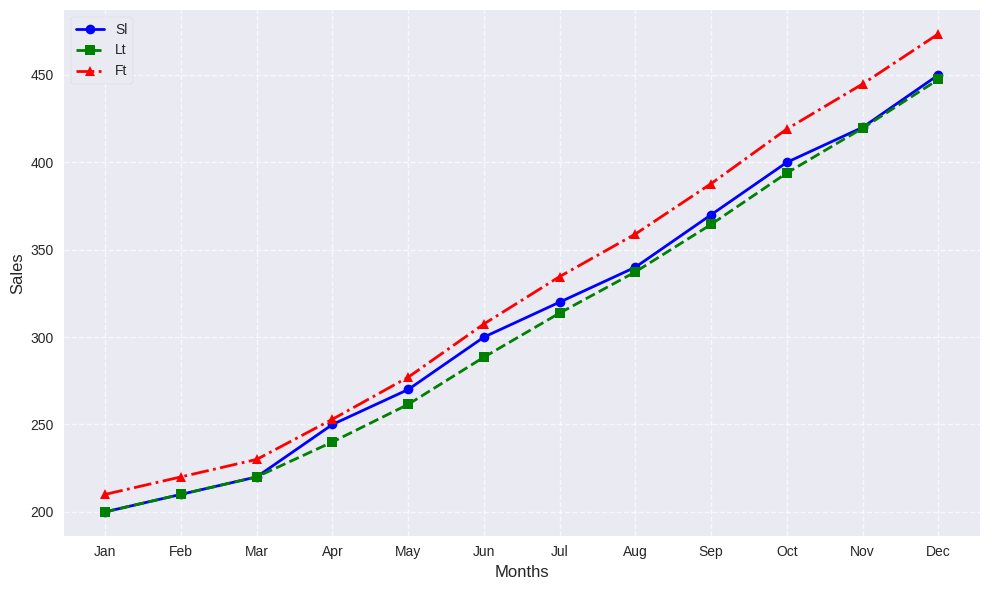

In [23]:
# Create a larger figure
plt.figure(figsize=(10, 6))

# Plot with distinct styles and markers
plt.plot(months, sales, label='Sl', color='blue', linewidth=2, marker='o')
plt.plot(months, Lt, label='Lt', color='green', linestyle='--', linewidth=2, marker='s')
plt.plot(months, Ft, label='Ft', color='red', linestyle='-.', linewidth=2, marker='^')

# Add labels and title with improved font sizes
plt.xlabel('Months', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('', fontsize=14, fontweight='bold')

# Add legend with a better location and frame
plt.legend(loc='best', frameon=True)

# Enhance grid
plt.grid(True, linestyle='--', alpha=0.7)

# Optional: Improve layout
plt.tight_layout()

# Show the plot
plt.show()


In [16]:
forecast_values_full = Ft + [next_forecast]
months_full = months + ["janvier+1"]
actual_values_full = sales + [None]

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


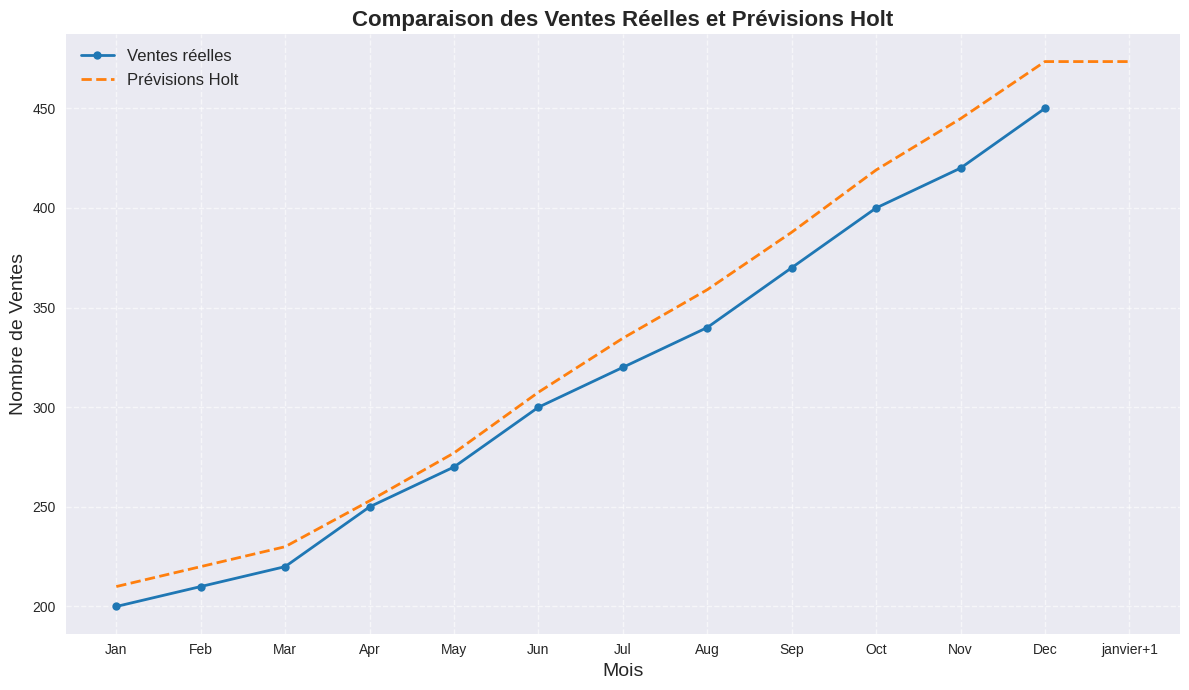

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Print available styles to check the correct name
print(plt.style.available)

# Set a clean and modern style
# Replace 'seaborn-vibrant' with a valid style from the list, e.g., 'seaborn-v0_8'
plt.style.use('seaborn-v0_8')

# Create the plot
plt.figure(figsize=(12, 7))
plt.plot(months_full, actual_values_full, marker='o', linestyle='-', linewidth=2,
         markersize=6, color='#1f77b4', label='Ventes réelles')
plt.plot(forecast_values_full, marker='x', linestyle='--', linewidth=2,
         markersize=6, color='#ff7f0e', label='Prévisions Holt')

# Add title and labels with custom font size
plt.title("Comparaison des Ventes Réelles et Prévisions Holt", fontsize=16, weight='bold')
plt.xlabel("Mois", fontsize=14)
plt.ylabel("Nombre de Ventes", fontsize=14)

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()